#**EqualizeHist تعدیل تعادل رنگ با**



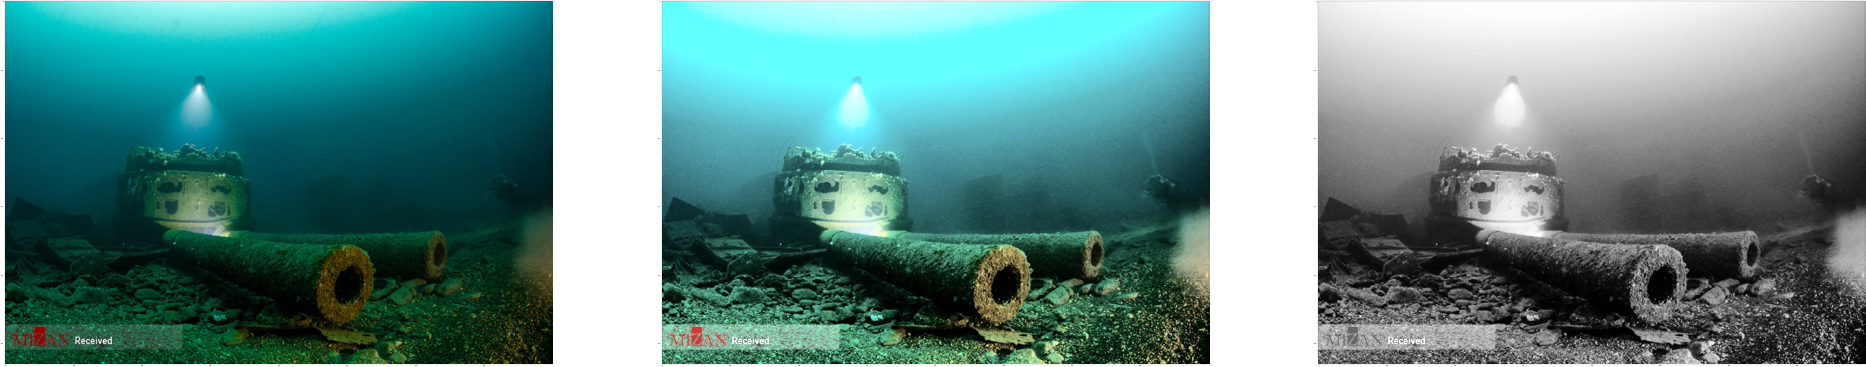

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the image
img = cv2.imread('/content/2052153_433.jpg')

# Convert the image to YUV color space
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Split the YUV image into channels
y, u, v = cv2.split(yuv)

# Apply the histogram equalization to the Y channel to increase contrast
equalized_yuv = cv2.equalizeHist(y)
equalized_gray = cv2.equalizeHist(gray)

# Merge the equalized Y channel with the original U and V channels
yuv = cv2.merge((equalized_yuv, u, v))

# Convert the merged YUV image back to RGB color space
final_YUV = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)

# Display the result
plt.figure(figsize=(200,189),dpi=12)
plt.subplot(1,3,1);plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2);plt.imshow(final_YUV[:,:,::-1])
plt.subplot(1,3,3);plt.imshow(equalized_gray,cmap='gray')

#**CLAHE  تعدیل تعادل رنگ با**

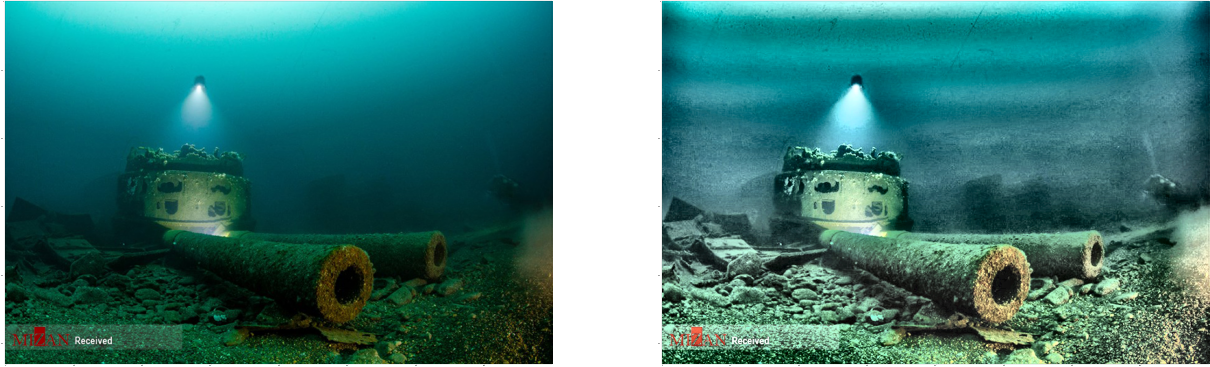

In [ ]:
import cv2
import numpy as np
# Load the image
img = cv2.imread('/content/2052153_433.jpg')

# Convert the image to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split the LAB image into channels
l, a, b = cv2.split(lab)

# Apply the CLAHE algorithm to the L channel to increase contrast
clahe = cv2.createCLAHE(clipLimit=9.0, tileGridSize=(9,9))
cl = clahe.apply(l)

# Merge the CLAHE enhanced L channel with the original A and B channels
limg = cv2.merge((cl,a,b))

# Convert the merged LAB image back to RGB color space
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Display the result
plt.figure(figsize=(200,189),dpi=12)
plt.subplot(1,3,1);plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2);plt.imshow(final[:,:,::-1])


#**تبدیل فوریه در محیط سیاه و سفید**

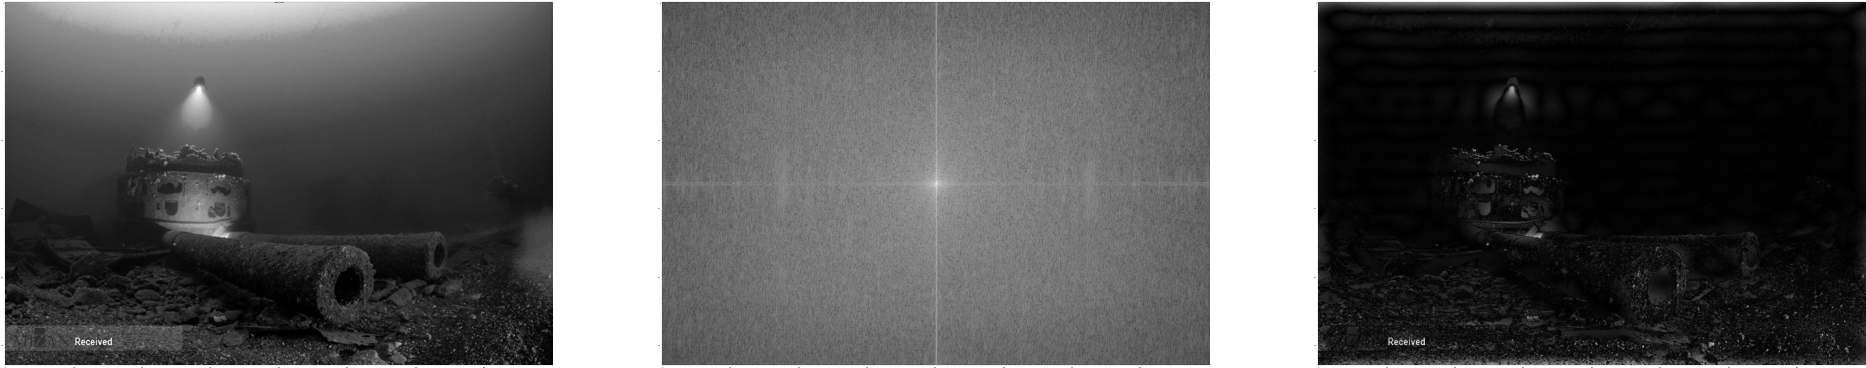

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image
img = cv2.imread('/content/2052153_433.jpg', 0)

# Apply frequency analysis using Fourier transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Image reconstruction using the inverse Fourier transform
rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Display the original image and the image after applying frequency analysis
plt.figure(figsize=(200,189),dpi=12)
plt.subplot(1,3,1);plt.title('imag_main');plt.imshow(img,cmap='gray')
plt.subplot(1,3,2);plt.imshow(magnitude_spectrum, cmap='gray')
plt.subplot(1,3,3);plt.imshow(img_back, cmap='gray')



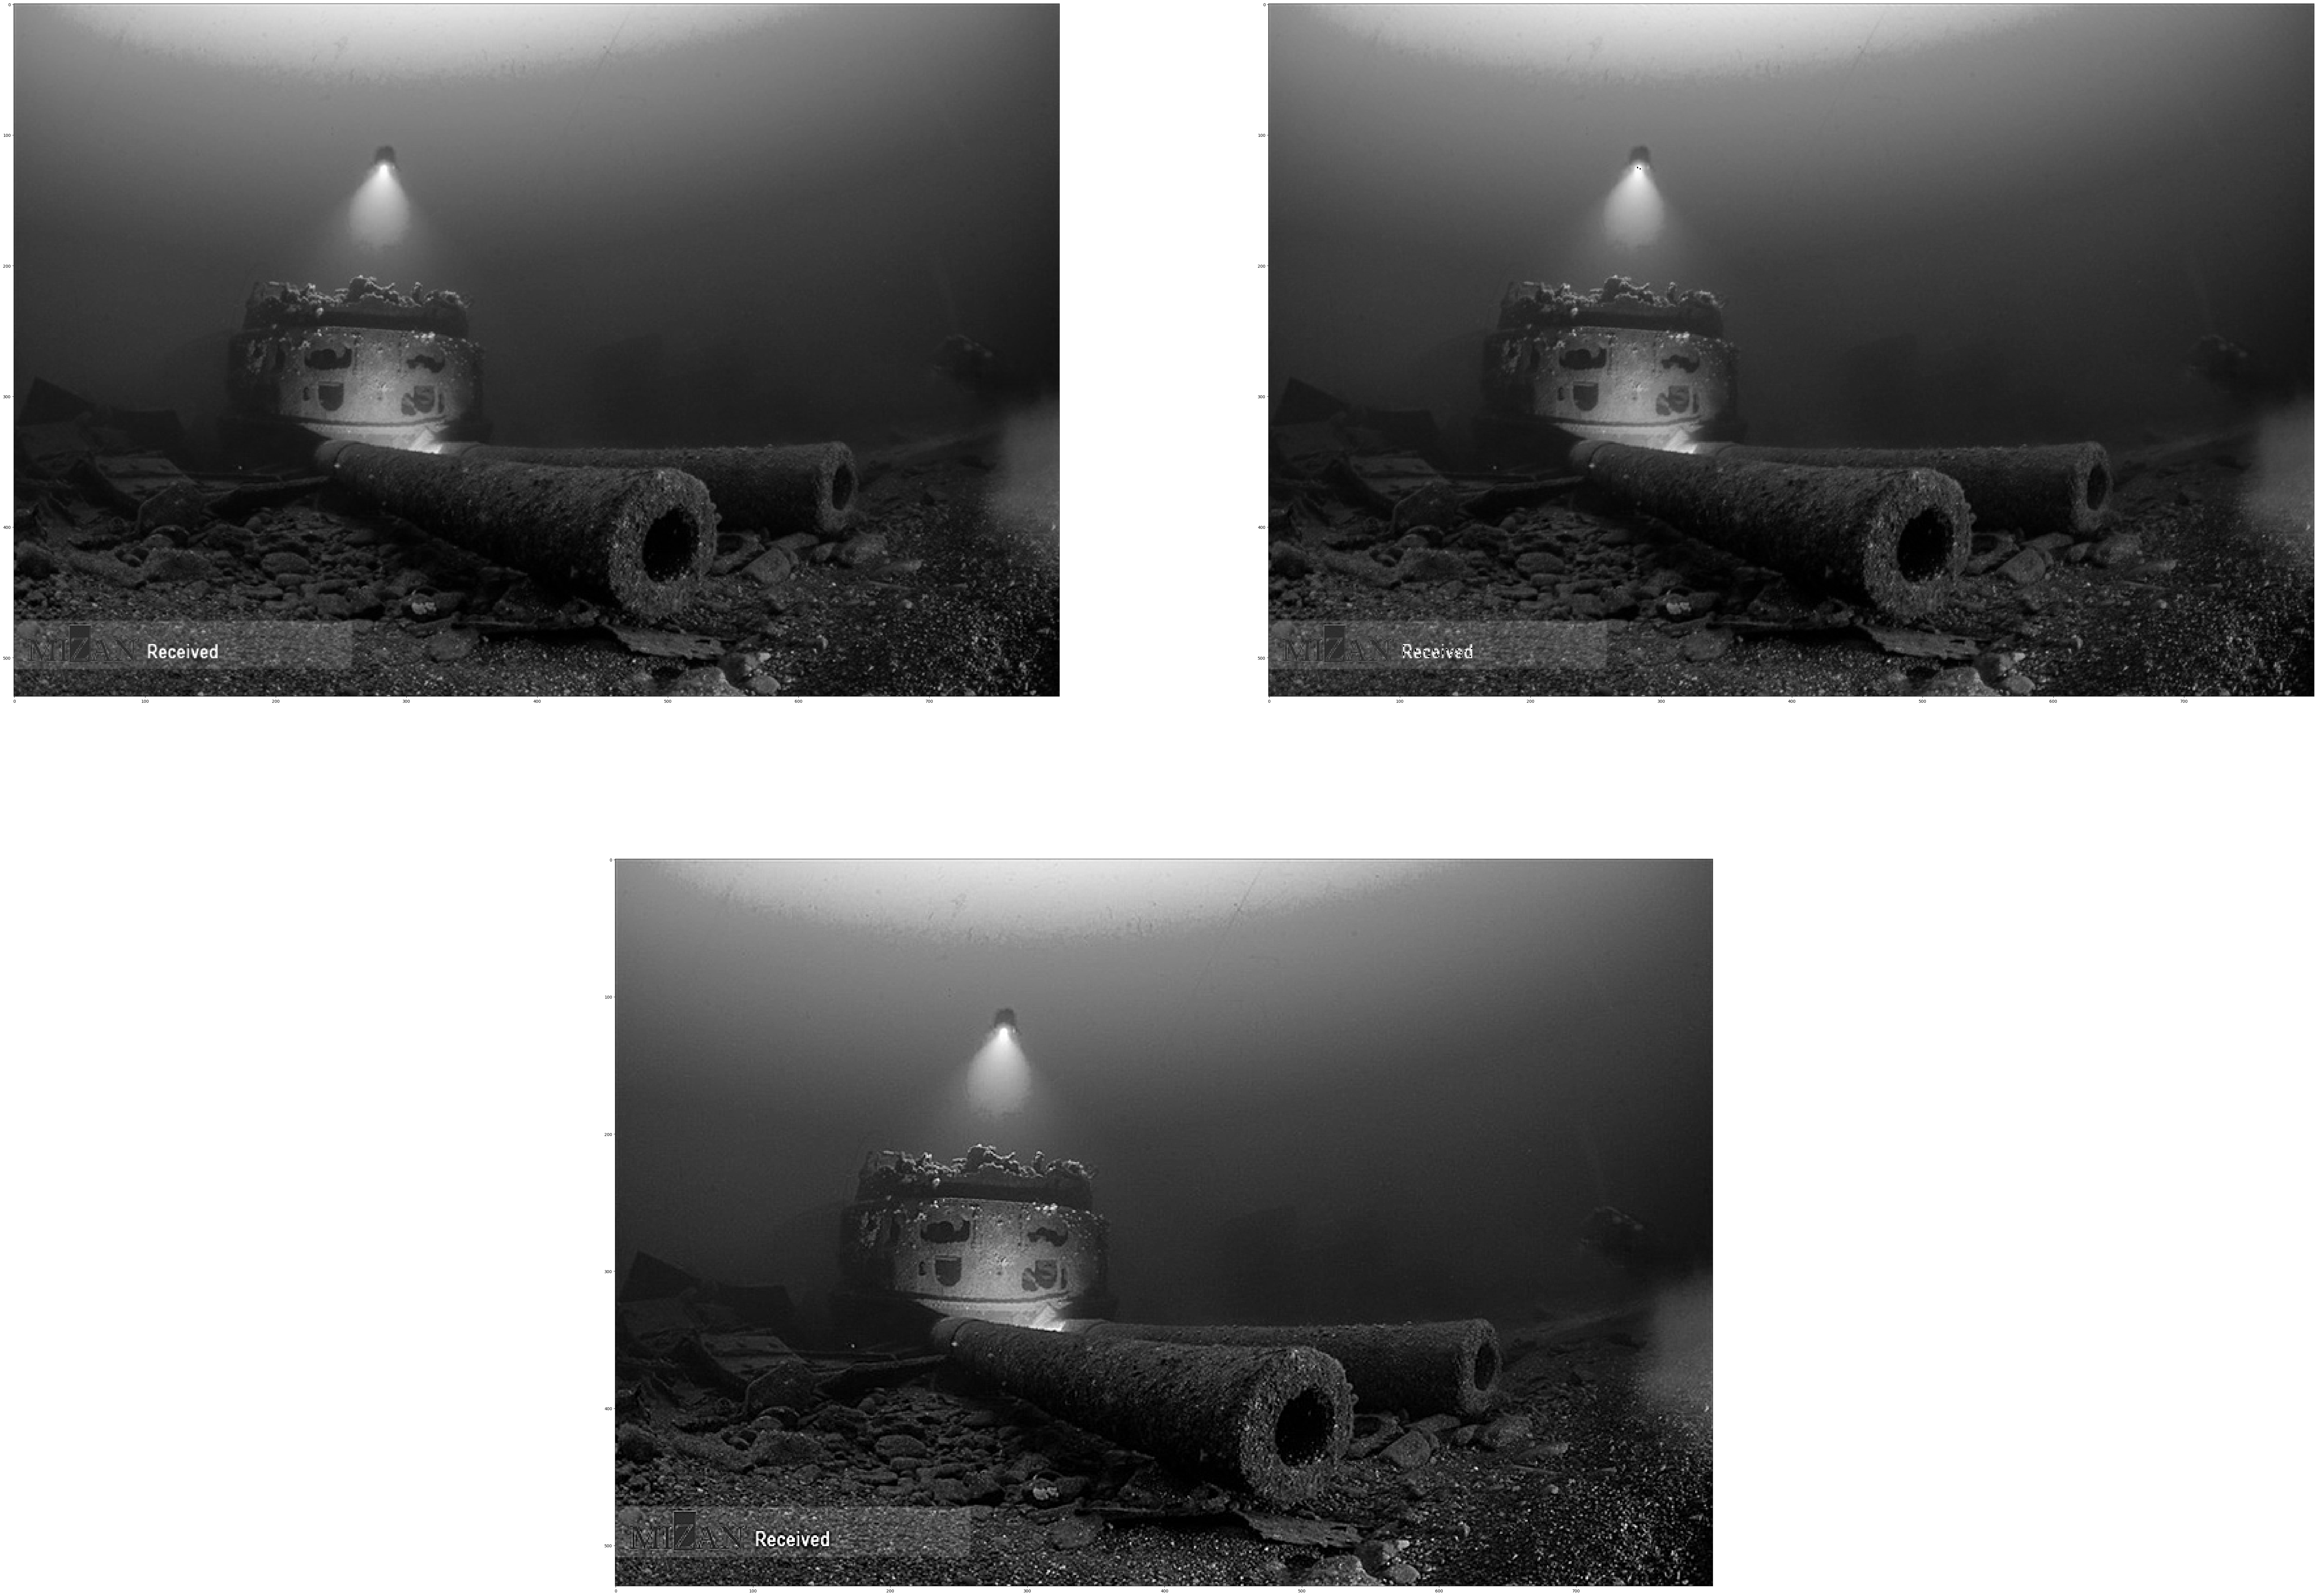

In [ ]:
import cv2
import numpy as np
img=cv2.resize(img,(400,400))
# Load the input image
img = cv2.imread('/content/2052153_433.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Fourier transform to the image
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Define a high-pass filter
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
mask = np.ones((rows, cols), np.uint8)
r = 70
cv2.circle(mask, (crow, ccol), r, 0, -1)

# Apply the filter to the Fourier transform
fshift_filtered = fshift * mask


# Apply inverse Fourier transform to the image
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Apply unsharp masking to the image
gaussian = cv2.GaussianBlur(img, (5, 5), 0)
unsharp_mask = cv2.addWeighted(img, 2, gaussian, -1, 0)

# Display the filtered images
plt.figure(figsize=(100,70)),
plt.subplot(221),
plt.imshow(img,cmap='gray')


plt.subplot(222)
plt.imshow(img_back.astype(np.uint8), cmap='gray')

plt.subplot(212)
plt.imshow(unsharp_mask, cmap='gray')



# **فیلتر تکراری**

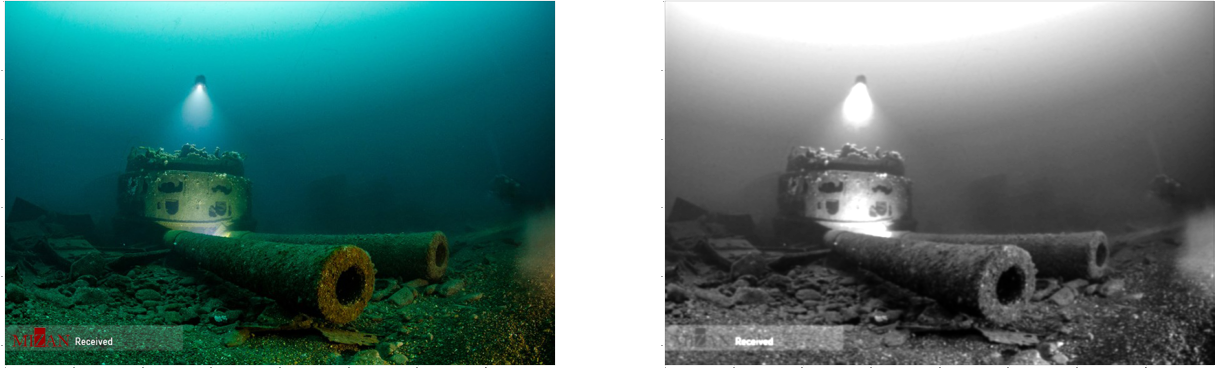

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
img = cv2.imread('/content/2052153_433.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the filter kernel
kernel = np.array([[0, 1, 0],
                   [2, 4, 1],
                   [0, 1, 0]]) / 8.0

# Apply the recursive filtering multiple times
filtered = gray.copy()
for i in range(5):
    filtered = cv2.filter2D(filtered, -1, kernel)

# Display the result
plt.figure(figsize=(130,130),dpi=12)
plt.subplot(1,2,1);plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2);plt.imshow(filtered,cmap='gray')

#**حذف درخشندگی**

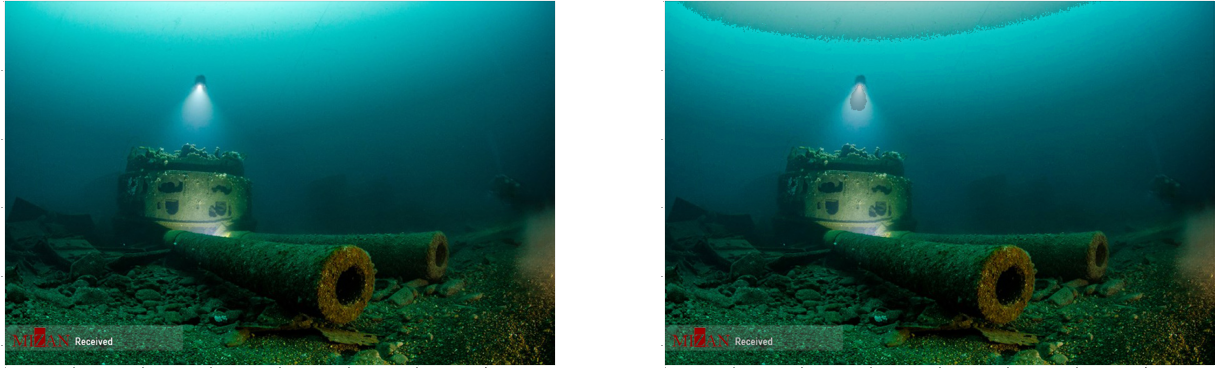

In [ ]:
def decrease_brightness(img, value=60):
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  h, s, v = cv2.split(hsv)

  lim = 255 - value
  v[v >= lim] -= value

  final_hsv = cv2.merge((h, s, v))
  img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
  return img
img = cv2.imread('/content/2052153_433.jpg')
image_brightness = decrease_brightness(img, value=50)

plt.figure(figsize=(130,130),dpi=12)
plt.subplot(1,2,1);plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2);plt.imshow(image_brightness[:,:,::-1])

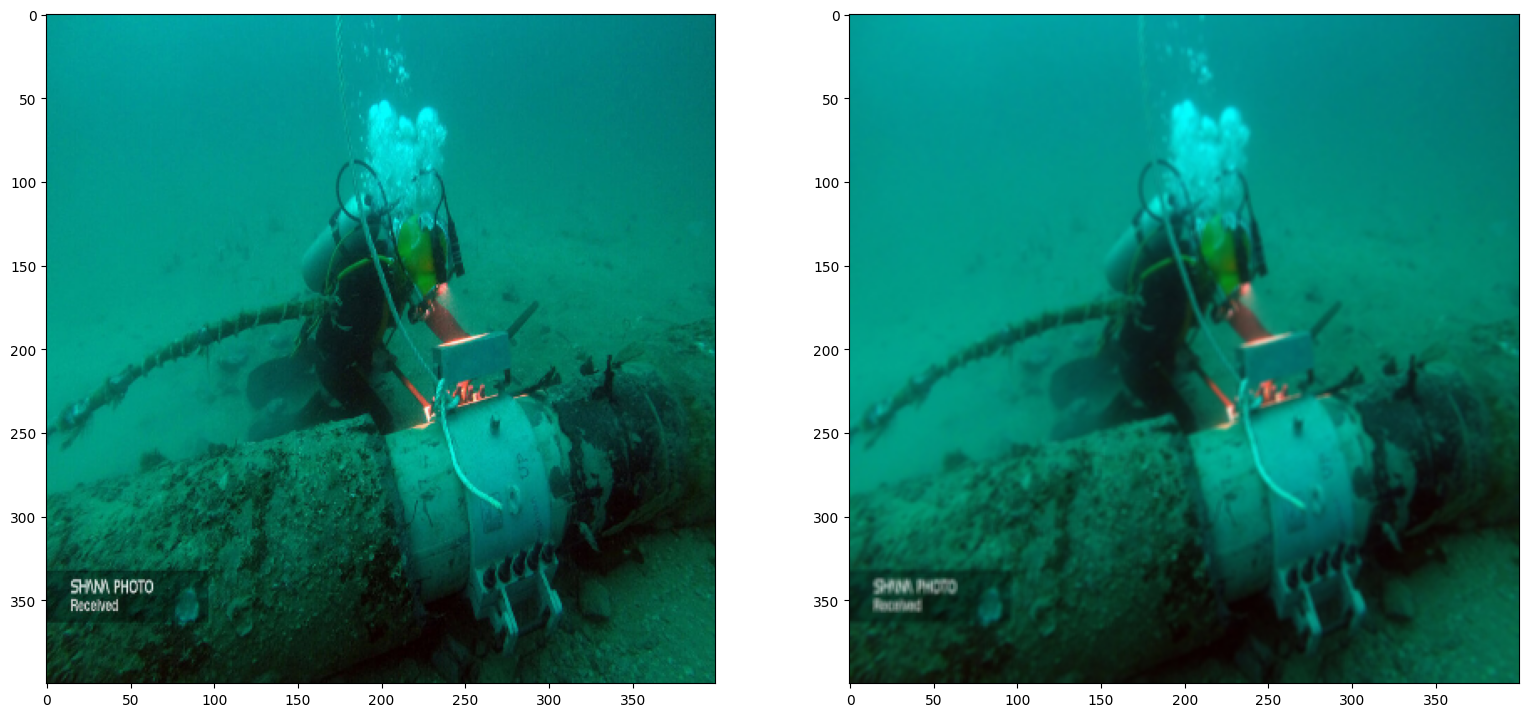

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
# خواندن تصویر
img = cv2.imread('/content/334790.jpg')
img=cv2.resize(img,(400,400))
# اعمال فیلترینگ میانگین
filtered_img = cv2.blur(img, (3, 3))

# نمایش تصویر اصلی و تصویر پس از اعمال فیلترینگ
plt.figure(figsize=(19,18))
plt.subplot(1,2,1);plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2);plt.imshow(filtered_img[:,:,::-1])


cv2.waitKey(0)
cv2.destroyAllWindows()